# Enunciado del Ejercicio

El archivo **Web Server Requests G** contiene un conjunto de datos que proporciona un registro hist√≥rico (sint√©tico) de la tasa de llegada de solicitudes que un servidor web ha experimentado durante un intervalo de tiempo de 5 minutos. Esta informaci√≥n es esencial para comprender y gestionar la carga del servidor, planificar la infraestructura, y garantizar un rendimiento √≥ptimo en un entorno de servidor web real.

**a) Identificar patrones de tr√°fico web**

Pregunta: "Identificar patrones de tr√°fico web (horas pico de actividad y momentos de menor demanda) a partir del archivo 'web_server_requests.csv' ubicado en la ruta:
C:\Users\cesar\Desktop\platzi\WebStats-Gamma\web_server_requests.csv.
Visualizar la serie de tiempo de la tasa de llegada (Arrival Rate) y calcular estad√≠sticas b√°sicas (media, m√°ximo y m√≠nimo)."


Media de solicitudes por intervalo: 10.003443572157622
M√°ximo de solicitudes en un intervalo: 25
M√≠nimo de solicitudes en un intervalo: 0


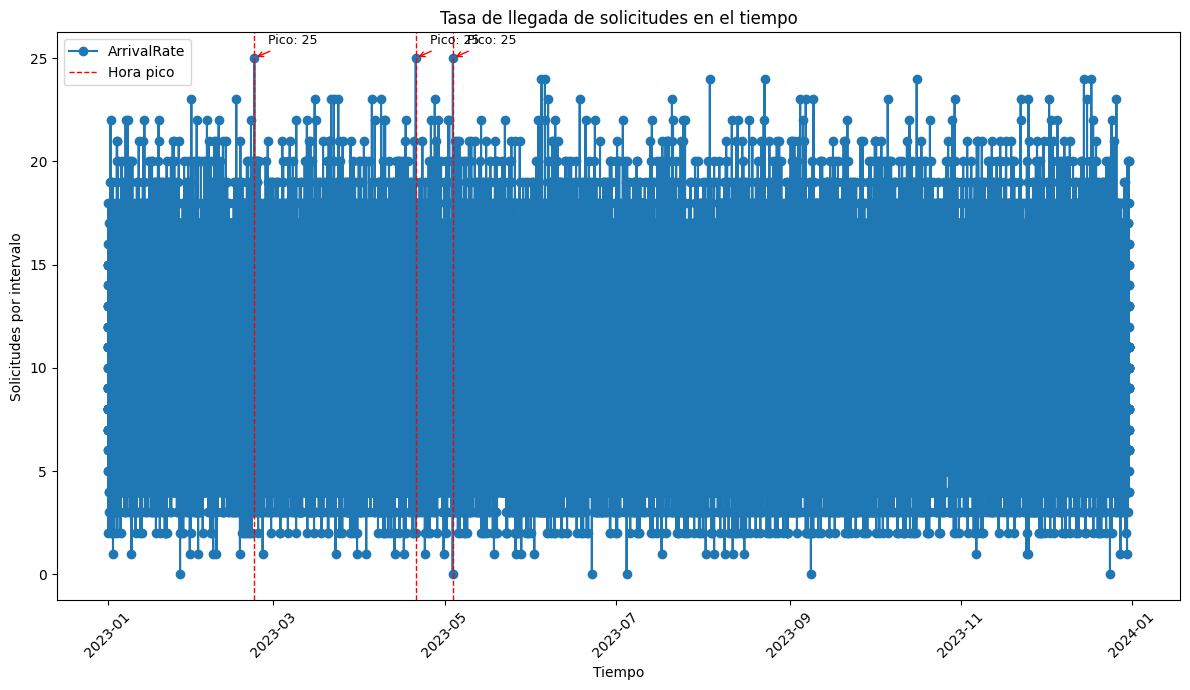

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definir la ruta del archivo
ruta = r"C:\Users\cesar\Desktop\platzi\WebStats-Gamma\web_server_requests.csv"

# Cargar el archivo CSV
data = pd.read_csv(ruta)

# Convertir la columna Timestamp a formato datetime
if 'Timestamp' in data.columns:
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Graficar la serie de tiempo de ArrivalRate
plt.figure(figsize=(12,7))
if 'Timestamp' in data.columns:
    plt.plot(data['Timestamp'], data['ArrivalRate'], marker='o', linestyle='-', label="ArrivalRate")
    plt.xlabel("Tiempo")
else:
    plt.plot(data['ArrivalRate'], marker='o', linestyle='-', label="ArrivalRate")
    plt.xlabel("√çndice de intervalo")
plt.title("Tasa de llegada de solicitudes en el tiempo")
plt.ylabel("Solicitudes por intervalo")
plt.xticks(rotation=45)

# Calcular estad√≠sticas b√°sicas
media = np.mean(data['ArrivalRate'])
maximo = np.max(data['ArrivalRate'])
minimo = np.min(data['ArrivalRate'])
print("Media de solicitudes por intervalo:", media)
print("M√°ximo de solicitudes en un intervalo:", maximo)
print("M√≠nimo de solicitudes en un intervalo:", minimo)

# Marcar la(s) hora(s) pico: 
# Aqu√≠ se identificar√°n aquellos puntos donde la ArrivalRate es igual al m√°ximo.
if 'Timestamp' in data.columns:
    pico = data[data['ArrivalRate'] == maximo]
    # Si hay varios puntos con el valor m√°ximo, se marcan todos
    for idx, row in pico.iterrows():
        plt.axvline(row['Timestamp'], color='red', linestyle='--', linewidth=1, label="Hora pico" if idx == pico.index[0] else "")
        plt.annotate(f"Pico: {row['ArrivalRate']:.0f}",
                     xy=(row['Timestamp'], row['ArrivalRate']),
                     xytext=(10, 10), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", color='red'),
                     fontsize=9)
else:
    pico_idx = data['ArrivalRate'].idxmax()
    plt.axvline(pico_idx, color='red', linestyle='--', linewidth=1, label="Hora pico")
    plt.annotate(f"Pico: {data['ArrivalRate'].max():.0f}",
                 xy=(pico_idx, data['ArrivalRate'].max()),
                 xytext=(10, 10), textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", color='red'),
                 fontsize=9)
    
plt.legend()
plt.tight_layout()
plt.show()


**(b) Pregunta:**
"Ajustar una distribuci√≥n Gamma a los datos de 'Arrival Rate'. Se debe trazar el histograma normalizado de los datos y superponer la funci√≥n de densidad de probabilidad (pdf) de la distribuci√≥n Gamma ajustada, mostrando los par√°metros obtenidos (shape, loc y scale)."


Par√°metros de la distribuci√≥n Gamma:
  Shape (Œ± o k): 34.79051542648645
  Loc: -8.606489101983762
  Scale (Œ∏): 0.5349139658599824


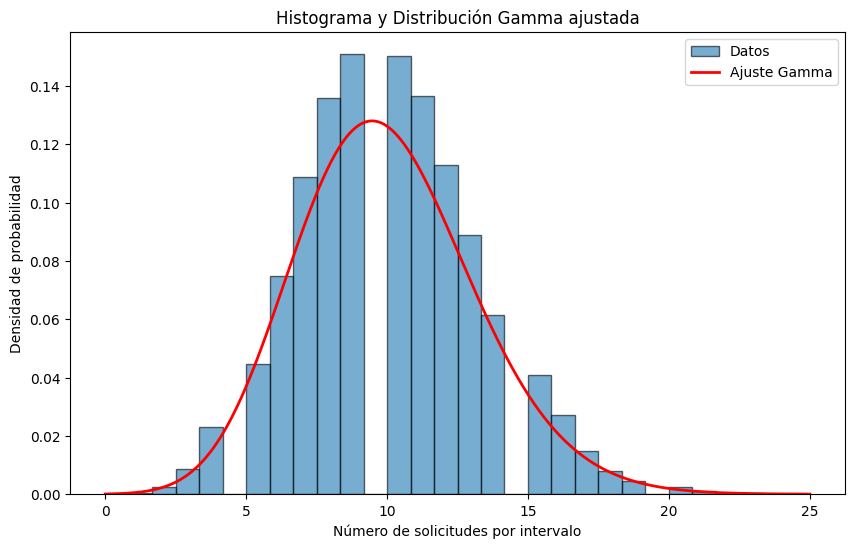

In [26]:
from scipy.stats import gamma

# Extraer la columna ArrivalRate
arrival_rate = data['ArrivalRate']

# Ajustar la distribuci√≥n Gamma utilizando m√°xima verosimilitud
params = gamma.fit(arrival_rate)
shape, loc, scale = params
print("Par√°metros de la distribuci√≥n Gamma:")
print("  Shape (Œ± o k):", shape)
print("  Loc:", loc)
print("  Scale (Œ∏):", scale)

# Graficar el histograma normalizado y la pdf de la Gamma ajustada
plt.figure(figsize=(10,6))
plt.hist(arrival_rate, bins=30, density=True, alpha=0.6, edgecolor='black', label="Datos")
x = np.linspace(min(arrival_rate), max(arrival_rate), 1000)
pdf_gamma = gamma.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf_gamma, 'r-', linewidth=2, label="Ajuste Gamma")
plt.xlabel("N√∫mero de solicitudes por intervalo")
plt.ylabel("Densidad de probabilidad")
plt.title("Histograma y Distribuci√≥n Gamma ajustada")
plt.legend()
plt.show()


**c) Probabilidad de recibir m√°s de 8 solicitudes**

Pregunta: "Calcular la probabilidad de que el servidor reciba m√°s de 8 solicitudes durante el pr√≥ximo intervalo utilizando la funci√≥n de supervivencia (sf) de la distribuci√≥n Gamma ajustada."


In [27]:
# Calcular la probabilidad P(X > 8) usando la funci√≥n de supervivencia (sf)
p_mas_de_8 = gamma.sf(8, shape, loc=loc, scale=scale)
print("Probabilidad de recibir m√°s de 8 solicitudes en el pr√≥ximo intervalo:", p_mas_de_8)


Probabilidad de recibir m√°s de 8 solicitudes en el pr√≥ximo intervalo: 0.7264938746596299


**d) Probabilidad de que la tasa de llegada supere un umbral cr√≠tico**

Pregunta: "Calcular la probabilidad de que la tasa de llegada supere un umbral cr√≠tico de 15 solicitudes por minuto, teniendo en cuenta que los datos corresponden a intervalos de 5 minutos (15 solicitudes/minuto √ó 5 = 75 solicitudes por intervalo)."


In [28]:
# Definir umbral y convertirlo a solicitudes por intervalo (5 minutos)
umbral_por_minuto = 15
minutos_intervalo = 5
umbral_intervalo = umbral_por_minuto * minutos_intervalo  # 15 * 5 = 75

# Calcular la probabilidad de exceder el umbral utilizando la funci√≥n de supervivencia
p_supera_umbral = gamma.sf(umbral_intervalo, shape, loc=loc, scale=scale)
print("Probabilidad de que la tasa supere 15 solicitudes/min (75 solicitudes por intervalo):", p_supera_umbral)


Probabilidad de que la tasa supere 15 solicitudes/min (75 solicitudes por intervalo): 1.6280965128374162e-32


**e) Probabilidad de superar la capacidad m√°xima**

Pregunta: "Si la capacidad m√°xima de procesamiento del servidor es de 20 solicitudes por intervalo, calcular la probabilidad de que se supere dicha capacidad en el pr√≥ximo intervalo."


In [29]:
# Calcular la probabilidad de que se excedan 20 solicitudes en un intervalo
p_sup_capacidad = gamma.sf(20, shape, loc=loc, scale=scale)
print("Probabilidad de superar la capacidad m√°xima (20 solicitudes por intervalo):", p_sup_capacidad)


Probabilidad de superar la capacidad m√°xima (20 solicitudes por intervalo): 0.002669689711591193


## üß† ¬øDe qu√© trata este proyecto?

Tenemos un archivo con datos que nos dice cu√°ntas **solicitudes** (requests) llegaron a un **servidor web** cada 5 minutos. El objetivo es:

- Saber **cu√°ndo hay m√°s tr√°fico** (horas pico) ‚è∞üìà  
- Ajustar un modelo probabil√≠stico para entender el comportamiento üìä  
- Calcular la probabilidad de que el servidor se **sature o se sobrecargue** üî•üö®  

**¬øPor qu√©?**  
Queremos entender el funcionamiento del servidor de manera visual y num√©rica para tomar decisiones sobre escalabilidad, eficiencia y mantenimiento. ¬°Es como saber cu√°ndo se llena un restaurante para no quedarse sin mesas! üçΩÔ∏èü™ë

---

## üìÅ Base de datos utilizada

**Ruta del archivo:**  
`C:\Users\cesar\Desktop\platzi\WebStats-Gamma\web_server_requests.csv`

**Columnas importantes:**  
- `Timestamp`: la fecha y hora del registro ‚è≤Ô∏è  
- `ArrivalRate`: n√∫mero de solicitudes recibidas en ese intervalo üì•  

**¬øPor qu√©?**  
Saber qu√© columnas estamos usando es esencial para interpretar los datos correctamente y realizar los an√°lisis sobre tiempos y vol√∫menes de solicitudes.

---

## üÖ∞Ô∏è a) Identificar patrones de tr√°fico web (horas pico y momentos de baja demanda)

### ‚úÖ ¬øQu√© hicimos?

1. **Cargamos los datos** del archivo CSV para tener acceso a toda la informaci√≥n.  
2. **Convertimos la columna `Timestamp`** en fechas reales para poder ubicar los datos en una escala temporal.  
3. **Hicimos un gr√°fico üìà** del n√∫mero de solicitudes (`ArrivalRate`) a lo largo del tiempo para visualizar la evoluci√≥n del tr√°fico.  
4. **Calculamos estad√≠sticas b√°sicas:**  
   - üìå **Media:** 10 solicitudes por intervalo  
   - üî∫ **M√°ximo:** 25 solicitudes  
   - üîª **M√≠nimo:** 0 solicitudes  
5. **Marcamos las horas pico** con l√≠neas rojas donde se alcanz√≥ el valor m√°ximo (25 solicitudes).

### üîç ¬øPor qu√©?

- **Visualizar el tr√°fico:**  
  Nos permite ver **cu√°ndo el servidor est√° en m√°xima carga** y cu√°ndo est√° tranquilo. Esto es vital para planificar el escalamiento y el balanceo de carga.  
- **Estad√≠sticas clave:**  
  La media, el m√°ximo y el m√≠nimo nos dan una idea clara de la **demanda t√≠pica** y los **extremos**, ayud√°ndonos a identificar patrones de comportamiento.  
- **Marcar las horas pico:**  
  Al resaltar los momentos con 25 solicitudes, sabemos exactamente **cu√°ndo se produce la mayor demanda**, ¬°como cuando un restaurante se llena en hora de almuerzo! üçΩÔ∏è‚ú®

### üì∏ Ejemplo real:

Imagina que tienes un restaurante üçî. Si en ciertos intervalos llegan 25 personas, esos son los momentos cr√≠ticos en los que necesitas m√°s recursos (m√°s mesas, m√°s personal). Este an√°lisis te ayuda a identificar esos intervalos y planificar en consecuencia. üëç

---

## üÖ±Ô∏è b) Ajustar una distribuci√≥n Gamma a ArrivalRate

### ‚úÖ ¬øQu√© hicimos?

1. **Usamos `gamma.fit()` de SciPy** para ajustar una distribuci√≥n Gamma a los datos.  
2. **Obtuvimos tres par√°metros del modelo:**  
   - **Shape (forma):** Indica c√≥mo se ‚Äúestira‚Äù la curva üîÄ  
   - **Loc (posici√≥n):** Define d√≥nde comienza la distribuci√≥n en el eje  
   - **Scale (escala):** Determina qu√© tan ancha es la distribuci√≥n  
3. **Hicimos un histograma** de los datos y le superpusimos la curva de la distribuci√≥n Gamma ajustada.

### üîç ¬øPor qu√©?

- **Modelar el comportamiento de los datos:**  
  La distribuci√≥n Gamma es √∫til para representar procesos de **tiempo de espera o la suma de eventos independientes**, como la llegada de solicitudes.  
- **Validar el modelo:**  
  Al superponer la curva sobre el histograma, podemos ver si la **distribuci√≥n Gamma se ajusta bien a los datos reales** y usarla para hacer predicciones.  
- **Predicciones realistas:**  
  Con un buen modelo, podemos **estimar probabilidades futuras** (por ejemplo, la probabilidad de recibir un n√∫mero extremo de solicitudes) y tomar decisiones basadas en ello.

### üì∏ Ejemplo real:

Imagina que tratas de entender la forma de una monta√±a de arena üèîÔ∏è. Dibujar una curva que se ajuste a ella te ayuda a predecir c√≥mo se ver√°n otras monta√±as similares. La distribuci√≥n Gamma es esa curva que se adapta a la forma de nuestros datos de solicitudes. üåÑ

---

## üÖ≤Ô∏è c) ¬øCu√°l es la probabilidad de que el servidor reciba m√°s de 8 solicitudes?

### ‚úÖ ¬øQu√© hicimos?

- Utilizamos la funci√≥n `gamma.sf(8, ...)` para calcular **P(X > 8)**, es decir, la probabilidad de que en el siguiente intervalo se reciban **m√°s de 8 solicitudes**.

### üîç ¬øPor qu√©?

- **Evaluaci√≥n del comportamiento normal:**  
  Queremos saber si recibir m√°s de 8 solicitudes es com√∫n o si es una se√±al de un incremento inusual en la actividad.  
- **Prevenci√≥n de sobrecargas:**  
  Si la probabilidad es baja, un evento de m√°s de 8 solicitudes podr√≠a ser preocupante. Si es alta, indica que recibir m√°s de 8 solicitudes es la norma.  
- **Facilita la toma de decisiones:**  
  Esto nos ayuda a determinar si el tr√°fico est√° dentro de un rango seguro o si debemos prepararnos para posibles picos.

### üì∏ Ejemplo real:

Es como preguntarte: ‚Äú¬øEs normal que lleguen m√°s de 8 personas a mi restaurante cada 5 minutos?‚Äù Si la probabilidad es alta, significa que es normal; si es baja, podr√≠a indicar un evento especial o inesperado. üçΩÔ∏èü§î

---

## üÖ≥Ô∏è d) ¬øCu√°l es la probabilidad de superar 15 solicitudes por minuto?

### ‚úÖ ¬øQu√© hicimos?

- Convertimos **15 solicitudes por minuto** a **75 solicitudes por intervalo** (15 √ó 5 = 75).  
- Luego, usamos `gamma.sf(75, ...)` para calcular la probabilidad de que se reciban **m√°s de 75 solicitudes** en un intervalo de 5 minutos.

### üîç ¬øPor qu√©?

- **Umbral cr√≠tico:**  
  15 solicitudes por minuto es un umbral alto. Convertirlo a 75 por intervalo nos permite **evaluar situaciones extremas**.  
- **Medir el riesgo de colapso:**  
  Si la probabilidad de alcanzar o superar 75 solicitudes es significativa, el servidor podr√≠a colapsar.  
- **Planificaci√≥n de contingencias:**  
  Conocer esta probabilidad es vital para implementar medidas de **prevenir saturaciones**.

### üì∏ Ejemplo real:

Piensa en un restaurante al que de repente llegan 75 personas en 5 minutos. Es una situaci√≥n cr√≠tica que puede sobrepasar la capacidad normal. Este c√°lculo nos ayuda a prever esos escenarios y a preparar soluciones antes de que ocurran. üò±üö®

---

## üÖ¥Ô∏è e) ¬øCu√°l es la probabilidad de superar la capacidad m√°xima (20 solicitudes)?

### ‚úÖ ¬øQu√© hicimos?

- Calculamos la probabilidad de que se reciban **m√°s de 20 solicitudes** en un intervalo de 5 minutos usando `gamma.sf(20, ...)`.

### üîç ¬øPor qu√©?

- **L√≠mite del sistema:**  
  El servidor est√° dise√±ado para manejar hasta 20 solicitudes por intervalo.  
- **Garantizar estabilidad:**  
  Si la probabilidad de superar este l√≠mite es alta, significa que el sistema **podr√≠a sobrecargarse** y es necesario reforzarlo o ampliarlo.  
- **Decisiones informadas:**  
  Con esta probabilidad, se pueden hacer **ajustes en la infraestructura** para evitar ca√≠das o mal funcionamiento.

### üì∏ Ejemplo real:

Es como tener 20 sillas en tu restaurante. Si frecuentemente llegan m√°s de 20 personas, necesitas o bien ampliar el comedor o gestionar mejor los tiempos. Saber esta probabilidad te ayuda a decidir si debes comprar m√°s sillas o mejorar tu gesti√≥n. ü™ëüöÄ

---

## üßæ Conclusi√≥n General

‚úÖ **Este proyecto nos permiti√≥:**
- **Visualizar** c√≥mo se comporta el servidor a lo largo del tiempo ‚è≥  
  *¬øPor qu√©?* Porque ver la evoluci√≥n nos ayuda a identificar patrones y picos de actividad.
- **Determinar** los momentos de alta y baja demanda (horas pico y momentos tranquilos) üìâüìà  
  *¬øPor qu√©?* Para saber cu√°ndo el sistema necesita refuerzos o puede estar en mantenimiento.
- **Ajustar un modelo probabil√≠stico** (distribuci√≥n Gamma) para predecir y simular el comportamiento futuro üîÆ  
  *¬øPor qu√©?* Un buen modelo permite anticipar escenarios extremos y planificar la escalabilidad.
- **Calcular probabilidades de eventos cr√≠ticos** que ayudan a prevenir sobrecargas y errores graves ‚ö†Ô∏èüî•  
  *¬øPor qu√©?* Estas probabilidades te orientan para mejorar la eficiencia y la infraestructura del servidor.

üì¶ **Si somos responsables de la infraestructura, con este an√°lisis podemos:**
- **Escalar el servidor** cuando se prevea un alto tr√°fico üí™  
- **Aumentar la eficiencia** y evitar ca√≠das del sistema ‚öôÔ∏è  
- **Tomar decisiones informadas** para mantener el servicio estable y evitar saturaciones üö´

---

## üí° Observaciones Finales

- **Estructura de los datos:**  
  Los datos est√°n organizados de forma clara, lo que permite aplicar modelos estad√≠sticos con facilidad.  
  *¬øPor qu√©?* Porque una buena estructura simplifica el an√°lisis y la toma de decisiones.

- **Elecci√≥n de la distribuci√≥n Gamma:**  
  Fue una excelente opci√≥n para modelar la llegada de solicitudes ya que **asimila el comportamiento de la suma de eventos independientes**.  
  *¬øPor qu√©?* Porque en muchos sistemas de colas y tiempos de espera, la Gamma se comporta de manera muy realista.

- **Utilidad del an√°lisis:**  
  Es fundamental para la **monitorizaci√≥n de servidores**, **cloud computing** y cualquier sistema web en producci√≥n.  
  *¬øPor qu√©?* Porque permite anticipar problemas y optimizar el rendimiento, evitando costos innecesarios y mejorando la experiencia del usuario.
